### <b> Lane-Emden (numerical) solutions for a given n </b>

#### <b> 1. Lane-Emden equation: (ξ = xi, θ = theta) </b>

* $ 1/ξ^2 * d/dξ(ξ^2 * dθ/dξ) + θ^n $ <b> (eq. 1) </b> 

By expanding the derivative term $ 1/ξ^2 * d/dξ(ξ^2 * dθ/dξ) $:

*  $ 1/ξ^2(2ξ * dθ/dξ + ξ^2 * d^2θ/dξ^2) =$ 
    * $ = 2/ξ * dθ/dξ + d^2θ/dξ^2 $ <b> (eq. 2) </b>

#### <b> 2. Inserting the expanded derivative into the first equation </b>
Inserting the expanded derivative <b> (eq.2) </b> back into the first equation <b>(eq.1)</b>, we get a second order differential equation $ θ(ξ)$:

* <b> $ d^2θ/dξ^2 + 2/ξ* dθ/dξ + θ^n = 0$ </b>

#### <b> 3. Turning the Second ODE into a First ODE </b>

We can define a new variable for the first derivative of theta $(dθ/dξ)$ as follows:

* $y1(ξ) = θ $
* $ y2(ξ) = dθ/dξ = dy1/dξ $

And as such, the second derivative of theta can be expressed as a first order derivative:
* $dy2/dξ = d^2θ/dξ^2 $



#### <b> 4. Rewriting he Lane-Emden equation </b>

Substituting $y1$ and $y2$ into the Lane-Emden equation, we get:

* $dy2/ξ+ 2/ξ*y2 + y1^n = 0$

#### <b> 5. First Order System and Initial Conditions </b>

After substituting $y1$ and $y2$ into the original Lane-Emden equations, we can now formulate a Fist Order Differential Equations System (instead of a Second Order one), and solve it numerically using the initial conditions as expressed below:

* System:
    * $ dy1/dξ = y2 $
    * $ dy2/dξ = -2/ξ * y2 - y1^n $

* Initial Conditions:
    * $ θ(ξ = 0) = y1(0) = 1 $
    * $ dθ(ξ = 0)/dξ = y2(0) = 0 $

In [22]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

In [23]:
# Polytropic index
n = 1

# First ODE system
def lane_emden_sys(xi, S):
    y1, y2 = S
    dy1_dxi = y2
    dy2_dxi = -2/xi * y2 - y1**n

    return [dy1_dxi, dy2_dxi]

y1_0 = 1
y2_0 = 0
lane_em_0 = (y1_0, y2_0)

# the initial value for xi can't be 0 otherwise dy2_dxi = -2/xi * y2 - y1**n would not be defined
# thefore we choose a really small value close to 0 as the initial xi
xi_0 = 1e-6 

# Range
xi_range = np.linspace(xi_0, 10, 1000)

SONAE: José Aroso e Liliana Ribeiro

In [24]:
le_sol = odeint(lane_emden_sys,y0=lane_em_0, t=xi_range,tfirst=True)

In [25]:
y1_sol = le_sol.T[0]
y2_sol = le_sol.T[1]

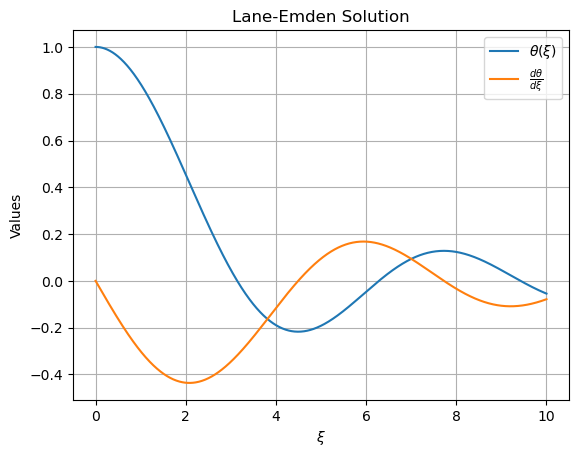

In [26]:
plt.plot(xi_range, y1_sol, label=r'$\theta(\xi)$')
plt.plot(xi_range, y2_sol, label=r"$\frac{d\theta}{d\xi}$")

plt.xlabel(r'$\xi$')
plt.ylabel('Values')
plt.title('Lane-Emden Solution')

plt.legend()
plt.grid(True)
plt.show()